In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\91963\Downloads\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


# 1. Find out how many males and females participated in the test.

In [6]:
df1 = df["gender"].value_counts()
df1

female    518
male      482
Name: gender, dtype: int64

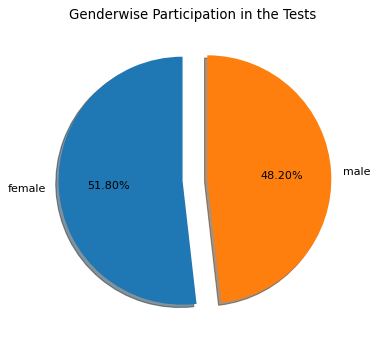

In [7]:
plt.figure(figsize=(5,8), dpi=80)
df1.plot(kind = "pie", subplots = True, autopct='%1.2f%%', startangle = 90, shadow = True, explode = (0.1,0.1))
plt.title("Genderwise Participation in the Tests ")
plt.ylabel("")
plt.show()

From the above we can say that, of the 1000 students : 518 students (51.80%) were females & 482 students (48.20%) were males

# 2. What do you think about the students' parental level of education?

In [8]:
df2 = df["parental level of education"].value_counts()
df2

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
df3 = df.groupby(["gender","parental level of education"]).size()
df3

gender  parental level of education
female  associate's degree             116
        bachelor's degree               63
        high school                     94
        master's degree                 36
        some college                   118
        some high school                91
male    associate's degree             106
        bachelor's degree               55
        high school                    102
        master's degree                 23
        some college                   108
        some high school                88
dtype: int64

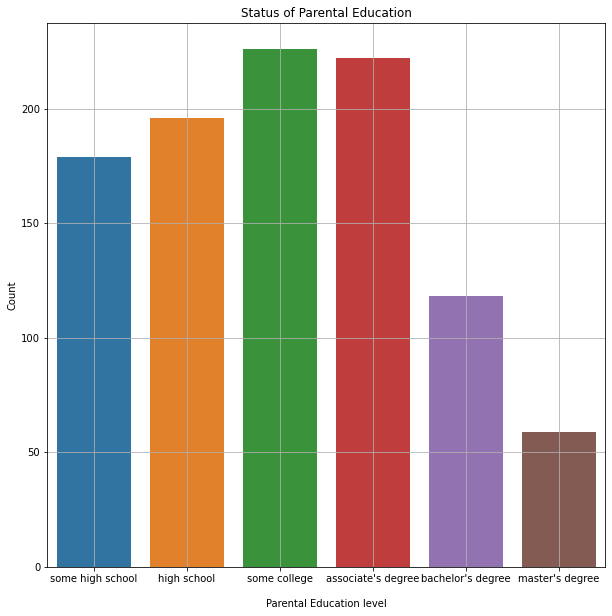

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x = "parental level of education", data = df)
plt.title("Status of Parental Education")
plt.xlabel("Parental Education level", fontsize = 10, labelpad=15 )
plt.ylabel("Count", fontsize = 10)
plt.grid()
plt.show()

from above we can conclude that most of the parents have some sort of school & college going experience.

#  Who scores the most on average for math, reading and writing based on

In [12]:
df4 = df.groupby("gender")["math score", "reading score", "writing score"].mean()
df4

C:\Users\91963\AppData\Local\Temp\ipykernel_21708\2323249737.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = df.groupby("gender")["math score", "reading score", "writing score"].mean()


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


We can say from the above that : For Maths test : Males have a higher average score compared to the females. For Reading & Writing tests: Females have a higher average score in comparison with the males.

b)Test preparation course

In [13]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

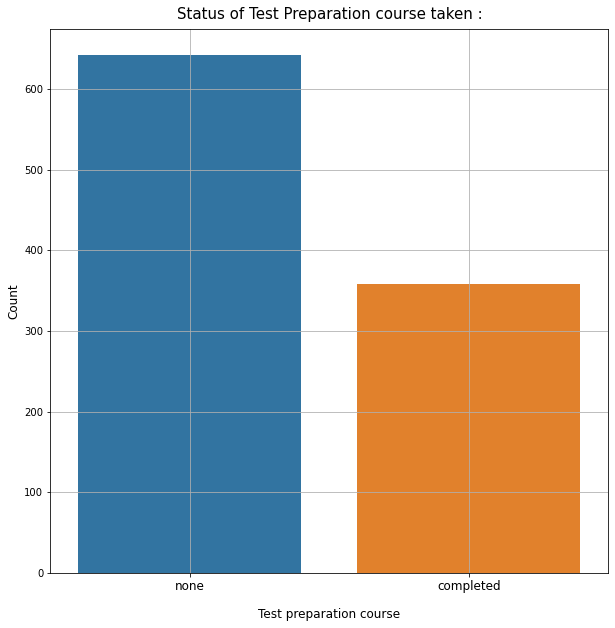

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x = "test preparation course", data = df)
plt.title("Status of Test Preparation course taken :", pad = 10, fontsize = 15)
plt.xlabel("Test preparation course", fontsize = 12, labelpad=15 )
plt.ylabel("Count", fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid()
plt.show()

In [15]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [16]:
df5 = df.groupby("test preparation course")["math score", "reading score", "writing score"].mean()
df5


C:\Users\91963\AppData\Local\Temp\ipykernel_21708\970310070.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 = df.groupby("test preparation course")["math score", "reading score", "writing score"].mean()


,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [18]:
df[['test preparation course','math score','writing score','reading score']].groupby(['test preparation course']).agg('median')

,math score,writing score,reading score
test preparation course,,,
completed,70.0,76.0,75.0
none,64.0,65.0,67.0


On an average, the students who've taken the prep. course are scoring higher than the students who haven't taken the course.

# 4. What do you think about the scoring variation for math, reading and writing

a)gender

In [19]:
df6 = df[["gender",'test preparation course','math score','writing score','reading score']]

In [20]:
df_females = df6[df6["gender"] == "female"]

In [21]:
df_males = df6[df6["gender"] == "male"]

In [22]:
def iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

IQRF = df_females[['math score','writing score','reading score']].apply(iqr)
print(f"The IQR for the Female students in various tests are : {IQRF} " )

The IQR for the Female students in various tests are : math score       20.00
writing score    18.00
reading score    19.75
dtype: float64 


In [23]:
def iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))

IQRM = df_males[['math score','writing score','reading score']].apply(iqr)
print(f"The IQR for the Male students in various tests are : {IQRM} " )

The IQR for the Male students in various tests are : math score       20.0
writing score    21.0
reading score    20.0
dtype: float64 


In [24]:
df_females.describe() 

,math score,writing score,reading score
count,518.000000,518.000000,518.000000
mean,63.376448,72.467181,72.590734
std,16.029928,14.844842,14.411018
min,0.000000,10.000000,17.000000
25%,54.000000,64.000000,63.250000
50%,65.000000,74.000000,73.000000
75%,74.000000,82.000000,83.000000
max,100.000000,100.000000,100.000000


In [25]:
df_males.describe()

,math score,writing score,reading score
count,482.000000,482.000000,482.000000
mean,68.821577,63.446058,65.545643
std,14.556411,14.227225,14.149594
min,27.000000,15.000000,23.000000
25%,59.000000,53.000000,56.000000
50%,69.000000,64.000000,66.000000
75%,79.000000,74.000000,76.000000
max,100.000000,100.000000,100.000000


In the Maths test : Boys are performing slightly better than the girls. 50% of the boys are scoring more than the girls. Most of the Boys are scoring in the range of 59-79, while the girls are in the range of (54-74).

In the Writing test : Girls are performing much better than the boys.

Most of the girls are scoring in the range of (64 - 82) marks while the boys are mainly scoring in the range of (53 -74) marks.

For the Reading test : Again the Girls are scoring better than the boys.

In [26]:
df_course_none = df[df['test preparation course'] == "none"]

In [27]:
df_course_complete = df[df['test preparation course'] == "completed"]

In [28]:
df_course_none.describe()

,math score,reading score,writing score
count,642.000000,642.000000,642.000000
mean,63.789720,66.417445,64.457944
std,15.705689,14.608896,15.041667
min,0.000000,17.000000,10.000000
25%,54.000000,57.000000,54.000000
50%,64.000000,67.000000,65.000000
75%,74.000000,76.000000,74.000000
max,100.000000,100.000000,100.000000


In [29]:
df_course_complete.describe()

,math score,reading score,writing score
count,358.000000,358.000000,358.000000
mean,69.966480,74.175978,74.684358
std,14.521847,13.537572,13.236412
min,23.000000,37.000000,36.000000
25%,61.000000,66.000000,67.000000
50%,70.000000,75.000000,76.000000
75%,79.000000,84.000000,83.750000
max,100.000000,100.000000,100.000000


The performance of the students who took and completed the test preperation course have done comparitively better than the students who didn't take the test. The scores of the students who didn't take the test prep course tend to vary more than that of the students who completed the prep. course.

# 5. The management needs your help to give bonus points to the top 25% of

students based on their maths score, so how will you help the management to achieve this.

Method 1
Find the 250 largest values based on the following priority of arrangement :

math score >reading score >writing score. Here the Python will give 1st priority to the Maths score, then the reading score , followed by the writing score.

In [30]:
df.nlargest(250, ["math score","reading score","writing score"], keep="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
999,male,group E,bachelor's degree,standard,completed,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
853,male,group D,associate's degree,free/reduced,none,77,78,73
427,female,group D,associate's degree,standard,none,77,77,73
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68


Method 2
Sort the values in the dataset and find the 250 largest scores scored in maths

In [31]:
top_students = df.sort_values('math score', ascending=False).nlargest(250,"math score")
top_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73



Note : Here it'll take only the top 250 students in the order that their names were fed into the original dataset.